In [5]:
import hdbscan
# from ortools.linear_solver import pywraplp
# from ortools.sat.python import cp_model
from search_engine.trip_planner.trip_classes.Day import Day
from search_engine.trip_planner.trip_classes.Item import Item
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.cluster import KMeans,DBSCAN, AgglomerativeClustering
# from k_means_constrained import KMeansConstrained
# import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
import pickle
from search_engine.trip_planner.trip_classes.Trip import Trip
from icecream import ic


In [6]:
items = [Item("hotel",{"name":"","id":"247869","coordinate":{'lat': 52.515915, 'lon': 13.394078},"guestrating":"9.2"}),
           Item("cultural",{"name":"","id":"W205728152","coordinate":{'lat': 52.516487, 'lon': 13.393826},"guestrating":"7"}),
           Item("architecture",{"name":"","id":"Q435399","coordinate":{'lat': 52.516399, 'lon': 13.3933},"guestrating":"7"}),
           Item("architecture",{"name":"","id":"Q2110747","coordinate":{'lat': 52.516899, 'lon': 13.3961},"guestrating":"7"}),
           Item("historic",{"name":"","id":"N3058015348","coordinate":{'lat': 52.517815, 'lon': 13.393262},"guestrating":"7"}),
           Item("sport",{"name":"","id":"R5758790","coordinate":{'lat': 52.529545, 'lon': 13.39354},"guestrating":"7"}),
           Item("shop",{"name":"","id":"N1714250170","coordinate":{'lat': 52.522987, 'lon': 13.382868},"guestrating":"7"}),
           Item("shop",{"name":"","id":"Q1901032","coordinate":{'lat': 52.519199, 'lon': 13.3836},"guestrating":"7"}),
           Item("shop",{"name":"","id":"Q1901029","coordinate":{'lat': 52.508099, 'lon': 13.3881},"guestrating":"7"}),
           Item("historic",{"name":"","id":"N262455591","coordinate":{'lat': 52.517254, 'lon': 13.392743},"guestrating":"7"}),
           Item("cultural",{"name":"","id":"N262455591","coordinate":{'lat': 52.517254, 'lon': 13.392743},"guestrating":"7"}),
           Item("cultural",{"name":"","id":"W15976892","coordinate":{'lat': 52.516705, 'lon': 13.394738},"guestrating":"7"}),
           Item("architecture",{"name":"","id":"Q806775","coordinate":{'lat': 52.5144, 'lon': 13.3955},"guestrating":"7"}),
           Item("cultural",{"name":"","id":"N3058015349","coordinate":{'lat': 52.517849, 'lon': 13.39373},"guestrating":"7"}),
           Item("cultural",{"name":"","id":"N437319063","coordinate":{'lat': 52.517593, 'lon': 13.393472},"guestrating":"7"}),
           Item("architecture",{"name":"","id":"Q1540327","coordinate":{'lat': 52.516899, 'lon': 13.3921},"guestrating":"7"}),
           Item("architecture",{"name":"","id":"Q439297","coordinate":{'lat': 52.516899, 'lon': 13.3928},"guestrating":"7"}),
           Item("historic",{"name":"","id":"N262457570","coordinate":{'lat': 52.513638, 'lon': 13.392648},"guestrating":"7"})]

In [7]:
data = pd.DataFrame({
    'id':[item.item_type for item in items],
                     'lat':[item.coordinate['lat'] for item in items],
                    'lon':[item.coordinate['lon'] for item in items]})


In [8]:
kmeans = KMedoids (n_clusters=5,metric='haversine')
data['label'] = kmeans.fit_predict(data[['lat','lon']].values)
sorted_data = data.sort_values(by='label')




/Users/ammar0ah/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(


In [9]:
data

,id,lat,lon,label
0,hotel,52.515915,13.394078,4
1,cultural,52.516487,13.393826,4
2,architecture,52.516399,13.393300,0
3,architecture,52.516899,13.396100,4
4,historic,52.517815,13.393262,1
5,sport,52.529545,13.393540,1
6,shop,52.522987,13.382868,1
7,shop,52.519199,13.383600,3
8,shop,52.508099,13.388100,2
9,historic,52.517254,13.392743,3


In [10]:
# centers = kmeans.cluster_centers_

<AxesSubplot:xlabel='lat', ylabel='lon'>

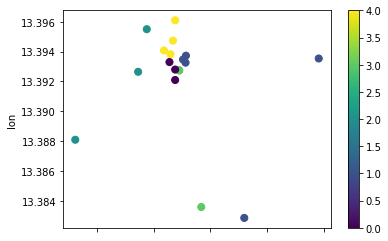

In [11]:
data.plot.scatter(x = 'lat', y = 'lon', c=data['label'], s=50, cmap='viridis')
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [12]:
colors = [
    'red',
    'blue',
    'gray',
    'darkred',
    'lightred',
    'orange',
    'beige',
    'green',
    'darkgreen',
    'lightgreen',
    'darkblue',
    'lightblue',
    'purple',
    'darkpurple',
    'pink',
    'cadetblue',
    'lightgray',
    'black'
]


In [13]:

# [print(f"{d['lat']},{d['label']},") for i,d in sorted_data.iterrows()]
kmeans.cluster_centers_

array([[52.516899, 13.3928  ],
       [52.517815, 13.393262],
       [52.513638, 13.392648],
       [52.517254, 13.392743],
       [52.516705, 13.394738]])

In [14]:
import folium

In [15]:
m = folium.Map(location=[52.529412,13.125847])

In [16]:
[folium.Marker(
    location=[item['lat'],item['lon']],
    icon=folium.Icon(color=colors[int(item['label'])]),
    tooltip=item['label']
).add_to(m)  for i,item in data.iterrows()]
m

In [17]:

folium.PolyLine(locations=data[['lat','lon']],weight=5).add_to(m)
m

In [18]:
[print(f"{d['lat']},{d['lon']},") for s,d in data.iterrows()]
# folium.PolyLine(locations=[[item['lat'],item['lon']] for i,item in sorted_data.iterrows() ],weight=5).add_to(m)
# m

52.515915,13.394078,
52.516487,13.393826,
52.516399,13.3933,
52.516899,13.3961,
52.517815,13.393262,
52.529545,13.39354,
52.522987,13.382868,
52.519199,13.3836,
52.508099,13.3881,
52.517254,13.392743,
52.517254,13.392743,
52.516705,13.394738,
52.5144,13.3955,
52.517849,13.39373,
52.517593,13.393472,
52.516899,13.3921,
52.516899,13.3928,
52.513638,13.392648,


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [19]:
"""Simple travelling salesman problem between cities."""

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
import requests
import json
API_KEY = '5b3ce3597851110001cf624859a9e4cf86a3409abd7387ad2d5cac7a'
url = 'https://api.openrouteservice.org/v2/matrix/driving-car'
def create_data_model(p_items):
    coordinates = []

    """Stores the data for the problem."""
    data = {}

    for i in range(len(p_items)):
        coordinates.append([p_items[i].coordinate['lon'],p_items[i].coordinate['lat']])
    body = {'locations': coordinates, 'metrics': ['distance'], 'units': 'km'}
    header = {'Authorization': API_KEY}
    try:
        response = requests.post(url=url, json=body, headers=header)
        if response.status_code == requests.codes.ok:
            data['distance_matrix'] = json.loads(response.text)['distances']
    except ValueError as err:
        print('distance matrix err: ', err)        

    data['num_vehicles'] = 1
    data['depot'] = 0
    return data


def get_routes(solution, routing, manager):
  """Get vehicle routes from a solution and store them in an array."""
  # Get vehicle routes and store them in a two dimensional array whose
  # i,j entry is the jth location visited by vehicle i along its route.
  routes = []
  for route_nbr in range(routing.vehicles()):
    index = routing.Start(route_nbr)
    route = [manager.IndexToNode(index)]
    while not routing.IsEnd(index):
      index = solution.Value(routing.NextVar(index))
      route.append(manager.IndexToNode(index))
    routes.append(route)
  return routes
def plan_itinerary_LP(p_items):
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model(p_items)

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        # print_solution(manager, routing, solution
        path = get_routes(solution,routing,manager)
        return [p_items[i] for i in path[0]]

# if __name__ == '__main__':
#     path = plan_itinerary_LP(items)
    # items =

In [20]:
from haversine import haversine

def get_distance(item1: Item, item2: Item):
    cord1 = item1.coordinate
    cord2 = item2.coordinate
    tuple1 = (cord1['lat'], cord1['lon'])
    tuple2 = (cord2['lat'], cord2['lon'])
    return haversine(tuple1, tuple2)

In [21]:
from kneed import KneeLocator
class ClusterPlanner:
    def __init__(self,items):
        self.n_clusters = 3
        self.clusterer = None
        self.food_types = ['restaurants', 'fast_food', 'food']
        self.items = [item for item in items if item.item_type not in self.food_types] 
        self.restaurants = [item for item in items if item.item_type in self.food_types]

        self.data = pd.DataFrame({
                         'index':[i for i in range(len(self.items))],
                         'lat':[item.coordinate['lat'] for item in self.items],
                         'lon':[item.coordinate['lon'] for item in self.items],
                         'type':[item.item_type for item in self.items]})

    def cluster_data(self):
        self.clusterer = KMeans(n_clusters=self.n_clusters)
        self.data['label'] = self.clusterer.fit_predict(self.data[['lat','lon']].values)

     # insert restaurant in the day at index
    def insert_restaurant(self, poi, idx, day):
        distances = []
        if self.restaurants:
            for rest in self.restaurants:
                distances.append(get_distance(poi, rest))
            index = distances.index(min(distances))
            day.insert_item(self.restaurants[index], idx)
            self.restaurants = [self.restaurants[l] for l in range(len(self.restaurants)) if l != index]

    def plan_days(self,i=0,days=[]):

        if i == self.n_clusters:
            return days
        places = self.data[self.data['label'] == i]
        p_items = [self.items[int(p['index'])] for l,p in places.iterrows()]
        day_places = p_items
        if len(p_items) > 3:
            itinerary = plan_itinerary_LP(p_items)
            day_places = itinerary
            day = Day(i,itinerary)
            days.append(day)

        else:
            day = Day(i,p_items)
            days.append(day)


        
        # for j in range(0,len(day_places),3):
        #     self.insert_restaurant(day_places[j],j,day)

        for k in range(0, len(day_places)):
            if 'hotel' == day_places[k].item_type and k != 0:
               day.swap_items(0, k)


        return self.plan_days(i+1,days)

                
def plan_itinerary_schedule_clusters(items:list):
    trip = Trip(days=[])
    # for k,city in items.items():
    clusterer = ClusterPlanner(items)
    clusterer.cluster_data()
    plan_days = clusterer.plan_days()
       
       
    trip.add_bulk_days(plan_days)

    return trip




In [26]:
with open('../testing/samples/istanbul_ankara_trip_data.pkl', 'rb') as input:
    m_trip = pickle.load(input)

trip = plan_itinerary_schedule_clusters(m_trip)
print(trip)

Trip Plan:[
day0:[hotel, cultural, cultural, historic, shop, religion, shop, shop, shop, historic, shop, shop, religion, cultural, historic, religion, religion], 
day1:[hotel, religion, religion, religion, cultural, shop, shop, shop, historic, cultural, shop, shop, historic, historic, shop, shop], 
day2:[cultural], 
day0:[hotel, religion, religion, religion, cultural, shop, shop, shop, historic, cultural, shop, shop, historic, historic, shop, shop], 
day1:[hotel, cultural, cultural, historic, shop, religion, shop, shop, shop, historic, shop, shop, religion, cultural, historic, religion, religion], 
day2:[cultural]]


In [27]:
all_path = []
for i,day in enumerate(trip.days):
    for item in day.items:
        all_path.append((item,i))

In [28]:
[folium.Marker(
    location=[item[0].coordinate['lat'],item[0].coordinate['lon']],
    icon=folium.Icon(color=colors[item[1]]),
    # tooltip=item['label']
).add_to(m)  for item in all_path]
m

In [30]:
coords = [[item[0].coordinate['lat'],item[0].coordinate['lon']] for item in all_path]
folium.PolyLine(locations=coords,weight=5).add_to(m)

m